In [1]:
#Importation des packages à utiliser
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# charger la base de données
data = pd.read_csv("C:/Users/genev/Desktop/GENEVIEVE/ydays/dpe-france.csv")

C:\Users\genev\AppData\Local\Temp\ipykernel_17580\1736104622.py:2: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:/Users/genev/Desktop/GENEVIEVE/ydays/dpe-france.csv")


In [11]:
# Afficher la base de données
data

,nom_methode_dpe,version_methode_dpe,date_etablissement_dpe,consommation_energie,classe_consommation_energie,estimation_ges,classe_estimation_ges,annee_construction,surface_thermique_lot,latitude,longitude,tr001_modele_dpe_type_libelle,tr002_type_batiment_description,code_insee_commune_actualise,tv016_departement_code,geo_adresse,geo_score
0,3CL,"3CL-DPE, version 1.3",2013-04-12,132.0,C,29.00,D,5200,190.00,46.040911,5.317098,Vente,Maison Individuelle,01430,01,3 Impasse du Foyer Rural 01160 Varambon,0.40
1,Méthode Facture,NaN,2013-04-20,0.0,N,0.00,N,1947,42.00,NaN,NaN,Vente,Maison Individuelle,83590,02,NaN,0.00
2,Méthode 3CL,"3CL-DPE, version 1.3",2013-04-16,326.0,E,18.00,C,2006,107.00,NaN,NaN,Vente,Maison Individuelle,03360,03,NaN,0.00
3,Méthode 3CL,"3CL-DPE, version 1.3",2013-05-06,326.0,E,14.00,C,1948,90.00,NaN,NaN,Vente,Logement,04320,04,NaN,0.00
4,Méthode 3CL,"3CL-DPE, version 1.3",2013-04-27,221.0,D,3.00,A,2006,78.20,44.773510,6.954523,Location,Logement,05120,05,Rue de la Bluette 05460 Abriès-Ristolas,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10716943,Th-BCE,8.1.0.0,2021-06-28,63.0,B,16.53,C,2021,83.10,50.154391,3.213478,Neuf,Maison Individuelle,59476,59,rue danielle mitterrand 59267 Proville,0.85
10716944,Th-BCE,8.1.0.0,2021-06-28,63.0,B,16.53,C,2021,83.10,50.153939,3.213875,Neuf,Maison Individuelle,59476,59,24 rue danielle mitterrand 59267 Proville,0.96
10716945,Th-BCE,8.1.0.0,2021-06-28,63.0,B,16.53,C,2021,83.10,50.154401,3.213296,Neuf,Maison Individuelle,59476,59,15 rue danielle mitterrand 59267 Proville,0.96
10716946,Th-BCE,8.1.0.0,2021-06-28,63.0,B,16.53,C,2021,83.10,50.154391,3.213478,Neuf,Maison Individuelle,59476,59,17 rue danielle mitterrand 59267 Proville,0.96


In [12]:
#afficher les valeurs manquantes par colonne
data.isnull().sum()

nom_methode_dpe                          0
version_methode_dpe                2048094
date_etablissement_dpe                   0
consommation_energie                     0
classe_consommation_energie              0
estimation_ges                           0
classe_estimation_ges                    0
annee_construction                       0
surface_thermique_lot                  441
latitude                           1986086
longitude                          1986086
tr001_modele_dpe_type_libelle            0
tr002_type_batiment_description          0
code_insee_commune_actualise          8627
tv016_departement_code                   0
geo_adresse                        1986086
geo_score                                0
dtype: int64

In [13]:
# Afficher le nombre total de valeurs manquantes
data.isnull().sum().sum()

8015420

In [14]:
#afficher le nombre de lignes et de colonnes de la table
data.shape

(10716948, 17)

On constate qu'il y a **10716948 individus(lignes) et 17 variables(colonnes)** étudiés dans cette base de données. Aussi nous avons seulement de valeurs manquantes pour des variables **version_methode_dpe, surface_thermique_lot, latitude, longitude, code_insee_commune_actualise, geo_adresse** respectivement **2048094, 441, 1986086, 1986086, 8627, 1986086.** Pour un total de ** 8015420**.

In [15]:
#afficher les types de colonnes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716948 entries, 0 to 10716947
Data columns (total 17 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   nom_methode_dpe                  object 
 1   version_methode_dpe              object 
 2   date_etablissement_dpe           object 
 3   consommation_energie             float64
 4   classe_consommation_energie      object 
 5   estimation_ges                   float64
 6   classe_estimation_ges            object 
 7   annee_construction               int64  
 8   surface_thermique_lot            float64
 9   latitude                         float64
 10  longitude                        float64
 11  tr001_modele_dpe_type_libelle    object 
 12  tr002_type_batiment_description  object 
 13  code_insee_commune_actualise     object 
 14  tv016_departement_code           object 
 15  geo_adresse                      object 
 16  geo_score                        float64
dtypes: flo

In [16]:
#affiche la stataistique descriptive des variables quantitatives
data.describe()

,consommation_energie,estimation_ges,annee_construction,surface_thermique_lot,latitude,longitude,geo_score
count,1.071695e+07,1.071695e+07,1.071695e+07,1.071651e+07,8.730862e+06,8.730862e+06,1.071695e+07
mean,1.893685e+02,3.408698e+01,1.897612e+03,1.510922e+02,4.699818e+01,2.528449e+00,6.362310e-01
std,3.203914e+04,3.062873e+04,3.989377e+02,4.520764e+04,2.265974e+00,2.744528e+00,3.668373e-01
min,-8.308829e+05,-1.900024e+05,-1.966000e+03,-1.630000e+02,-2.129622e+01,-6.177854e+01,0.000000e+00
25%,5.800000e+01,5.000000e+00,1.947000e+03,5.050000e+01,4.515132e+01,6.824090e-01,3.800000e-01
50%,1.550000e+02,1.336000e+01,1.974000e+03,7.313000e+01,4.747789e+01,2.401983e+00,7.900000e-01
75%,2.373900e+02,3.264000e+01,2.001000e+03,1.011000e+02,4.885115e+01,4.830050e+00,9.600000e-01
max,1.000000e+08,1.000000e+08,3.276700e+04,1.000000e+08,5.108233e+01,5.553628e+01,9.900000e-01


In [17]:
# affiche la corrélation entre les variables quantitatives
data.corr()

,consommation_energie,estimation_ges,annee_construction,surface_thermique_lot,latitude,longitude,geo_score
consommation_energie,1.000000,0.972751,-0.000973,-0.000006,0.001810,0.000423,-0.000342
estimation_ges,0.972751,1.000000,-0.001411,-0.000001,0.002060,0.000601,-0.000447
annee_construction,-0.000973,-0.001411,1.000000,-0.000441,-0.003560,-0.019532,0.056434
surface_thermique_lot,-0.000006,-0.000001,-0.000441,1.000000,-0.000706,0.000994,-0.000364
latitude,0.001810,0.002060,-0.003560,-0.000706,1.000000,-0.165532,0.096220
longitude,0.000423,0.000601,-0.019532,0.000994,-0.165532,1.000000,-0.007665
geo_score,-0.000342,-0.000447,0.056434,-0.000364,0.096220,-0.007665,1.000000


On constate que les variables consommation_energie et estimation_ges sont fortement corrélées(97,27%). On peut donc dire que la variable estimation_ges peut parfaitement expliquer la variable consommation_energie.

In [18]:
data.columns

Index(['nom_methode_dpe', 'version_methode_dpe', 'date_etablissement_dpe',
       'consommation_energie', 'classe_consommation_energie', 'estimation_ges',
       'classe_estimation_ges', 'annee_construction', 'surface_thermique_lot',
       'latitude', 'longitude', 'tr001_modele_dpe_type_libelle',
       'tr002_type_batiment_description', 'code_insee_commune_actualise',
       'tv016_departement_code', 'geo_adresse', 'geo_score'],
      dtype='object')

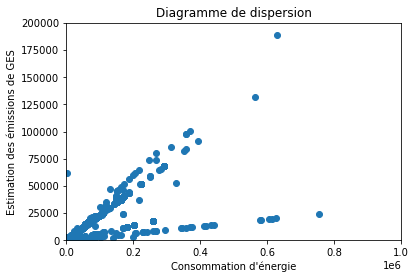

In [23]:
# Tracé de diagramme de dispersion entre les  variables consommation_energie et 'estimation_ges
plt.scatter(data['consommation_energie'], data['estimation_ges'])
plt.xlabel('Consommation d\'énergie')
plt.ylabel('Estimation des émissions de GES')
plt.title('Diagramme de dispersion')
plt.xlim(0,1000000)
plt.ylim(0,200000)
plt.show()


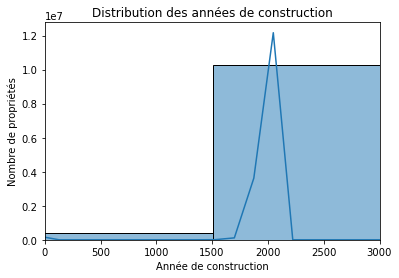

In [30]:
# Tracé d'un histogramme pour la variable 'annee_construction'
sns.histplot(data['annee_construction'], bins=20, kde=True)
plt.xlabel('Année de construction')
plt.ylabel('Nombre de propriétés')
plt.title('Distribution des années de construction')
plt.xlim(0,3000)
plt.show()


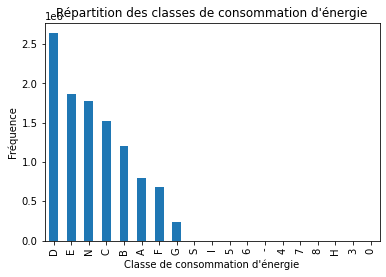

In [27]:
# Utilisation de Pandas pour tracer un diagramme en barres
data['classe_consommation_energie'].value_counts().plot(kind='bar')
plt.xlabel('Classe de consommation d\'énergie')
plt.ylabel('Fréquence')
plt.title('Répartition des classes de consommation d\'énergie')
plt.show()


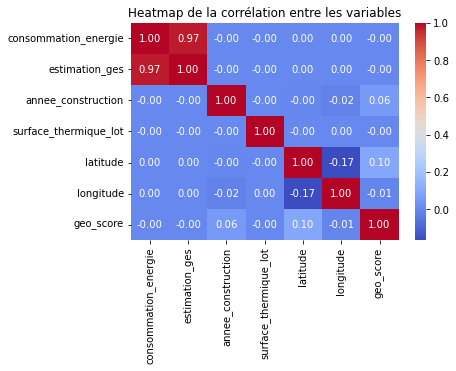

In [28]:
# Utilisation de Seaborn pour tracer une heatmap de la matrice de corrélation
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de la corrélation entre les variables')
plt.show()


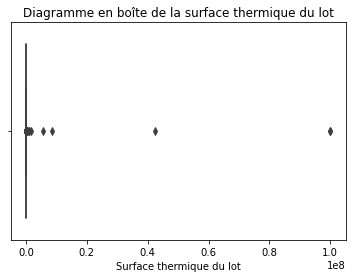

In [29]:
#Tracé d'un diagramme en boîte pour la variable 'surface_thermique_lot'
sns.boxplot(x='surface_thermique_lot', data=data)
plt.xlabel('Surface thermique du lot')
plt.title('Diagramme en boîte de la surface thermique du lot')
plt.show()


In [6]:
# Suppression des valeurs manquantes 
# Pour supprimer les valeurs manquantes dans la base de donnée initiale alors je mets inplace=true dans la paranthèse
dat=data.dropna()

In [7]:
dat

,nom_methode_dpe,version_methode_dpe,date_etablissement_dpe,consommation_energie,classe_consommation_energie,estimation_ges,classe_estimation_ges,annee_construction,surface_thermique_lot,latitude,longitude,tr001_modele_dpe_type_libelle,tr002_type_batiment_description,code_insee_commune_actualise,tv016_departement_code,geo_adresse,geo_score
0,3CL,"3CL-DPE, version 1.3",2013-04-12,132.00,C,29.00,D,5200,190.0,46.040911,5.317098,Vente,Maison Individuelle,01430,01,3 Impasse du Foyer Rural 01160 Varambon,0.40
4,Méthode 3CL,"3CL-DPE, version 1.3",2013-04-27,221.00,D,3.00,A,2006,78.2,44.773510,6.954523,Location,Logement,05120,05,Rue de la Bluette 05460 Abriès-Ristolas,0.40
9,3CL - DPE,V2012,2013-05-02,249.12,E,13.26,C,2006,91.0,48.140830,4.211108,Location,Maison Individuelle,10331,10,16bis Route de Nicey 10260 Rumilly-lès-Vaudes,0.82
13,3CL,"3CL-DPE, version 1.3",2013-04-13,322.00,E,17.00,C,1983,80.0,49.179488,-0.501815,Vente,Maison Individuelle,14470,14,4 Rue des Ecoles 14740 Saint-Manvieu-Norrey,0.44
15,FACTURE - DPE,V2012,2013-04-09,29.54,A,6.91,B,2006,87.5,45.631007,0.165321,Neuf,Maison Individuelle,16015,16,Hameau des Rossignols 16000 Angoulême,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10716942,Th-BCE,8.1.0.0,2021-06-28,62.73,B,16.47,C,2021,83.1,50.154412,3.213073,Neuf,Maison Individuelle,59476,59,13 rue danielle mitterrand 59267 Proville,0.96
10716943,Th-BCE,8.1.0.0,2021-06-28,63.00,B,16.53,C,2021,83.1,50.154391,3.213478,Neuf,Maison Individuelle,59476,59,rue danielle mitterrand 59267 Proville,0.85
10716944,Th-BCE,8.1.0.0,2021-06-28,63.00,B,16.53,C,2021,83.1,50.153939,3.213875,Neuf,Maison Individuelle,59476,59,24 rue danielle mitterrand 59267 Proville,0.96
10716945,Th-BCE,8.1.0.0,2021-06-28,63.00,B,16.53,C,2021,83.1,50.154401,3.213296,Neuf,Maison Individuelle,59476,59,15 rue danielle mitterrand 59267 Proville,0.96


In [8]:
dat.isnull().sum()

nom_methode_dpe                    0
version_methode_dpe                0
date_etablissement_dpe             0
consommation_energie               0
classe_consommation_energie        0
estimation_ges                     0
classe_estimation_ges              0
annee_construction                 0
surface_thermique_lot              0
latitude                           0
longitude                          0
tr001_modele_dpe_type_libelle      0
tr002_type_batiment_description    0
code_insee_commune_actualise       0
tv016_departement_code             0
geo_adresse                        0
geo_score                          0
dtype: int64

In [10]:
data.isnull().sum()

nom_methode_dpe                          0
version_methode_dpe                2048094
date_etablissement_dpe                   0
consommation_energie                     0
classe_consommation_energie              0
estimation_ges                           0
classe_estimation_ges                    0
annee_construction                       0
surface_thermique_lot                  441
latitude                           1986086
longitude                          1986086
tr001_modele_dpe_type_libelle            0
tr002_type_batiment_description          0
code_insee_commune_actualise          8627
tv016_departement_code                   0
geo_adresse                        1986086
geo_score                                0
dtype: int64

In [4]:
# Selection des colonnes 'consommation_energie' et 'estimation_ges'
final_data = data[['consommation_energie','estimation_ges']]

In [5]:
final_data

,consommation_energie,estimation_ges
0,132.0,29.00
1,0.0,0.00
2,326.0,18.00
3,326.0,14.00
4,221.0,3.00
...,...,...
10716943,63.0,16.53
10716944,63.0,16.53
10716945,63.0,16.53
10716946,63.0,16.53


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt




In [13]:
# Séparation des données en ensemble d'entraînement et ensemble de test
X = final_data['consommation_energie'].values.reshape(-1, 1)  # Variable indépendante (consommation d'énergie)
y = final_data['estimation_ges'].values  # Variable cible (estimation des émissions de GES)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [14]:
# Initialisation du modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle sur les données d'entraînement
model.fit(X_train, y_train)



LinearRegression()

In [15]:
# Prédiction sur les données de test
y_pred = model.predict(X_test)

# Affichage des coefficients du modèle
print('Coefficients du modèle :', model.coef_)

# Affichage de l'interception du modèle
print('Interception du modèle :', model.intercept_)

Coefficients du modèle : [0.22994997]
Interception du modèle : -16.686280212259895


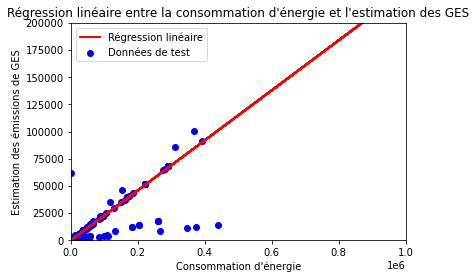

In [17]:

# Tracé du nuage de points
plt.scatter(X_test, y_test, color='blue', label='Données de test')

# Tracé de la droite de régression
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Régression linéaire')

# Ajout des labels et de la légende
plt.xlabel('Consommation d\'énergie')
plt.ylabel('Estimation des émissions de GES')
plt.title('Régression linéaire entre la consommation d\'énergie et l\'estimation des GES')
plt.legend()
plt.xlim(0,1000000)
plt.ylim(0,200000)
# Affichage du graphique
plt.show()
